In [87]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial

In [88]:
data_path = '../../data/temporal_lda_kl/'

In [89]:
fandom_list_futu = [i for i in os.listdir(data_path) if 'futu' in i]

In [90]:
fandom_list_prev = [i for i in os.listdir(data_path) if 'prev' in i]

In [37]:
df_all_futu = df_all_futu.dropna(subset=['Cos', 'Kudos'])
# x = abs(df['Cos_x'] - df['Cos_y'])
x = df_all_futu['Cos']
y = df_all_futu['Kudos']
stats.pearsonr(x,y)


(-0.03214983854821489, 5.9916756315422234e-35)

In [99]:
for i,fandom in enumerate(fandom_list_futu):
#     df = pd.read_csv(os.path.join(data_path, fandom_list_futu[i]), sep = '\t')

    df2 = pd.read_csv(os.path.join(data_path, fandom_list_futu[i]), sep = '\t')
#     df2 = pd.read_csv(os.path.join(data_path, fandom_list_prev[i]), sep = '\t')

#     df = pd.merge(df1, df2, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
#        'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
#        'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
#        'PublishDate', 'Rating', 'Relationship', 'Summary', 'Title', 'URL',
#        'UpdateDate', 'Words'], how='inner')
    
#     print(fandom, len(df))
#     df['KL'] = abs(df['KL_x'] - df['KL_y'])
    df2 = df2.dropna(subset=['KL', 'Words'])
    x = df2['KL']
    y = df2['Words']
    print(stats.pearsonr(x,y))
    

(-0.11202203892374794, 1.4573109000624669e-09)
(-0.13003216811523893, 3.717710170321194e-05)
(-0.11971494204806102, 7.4154602499235722e-07)
(-0.1604144107104985, 2.6318877613796865e-35)
(-0.060825151128877201, 4.318243230208708e-06)
(0.10749209844435322, 3.0666659507492799e-11)
(-0.12314917708905207, 1.4220599526229679e-09)
(-0.059083283498455597, 0.11834275891249656)
(-0.18382792562296879, 0.067129981580447792)
(-0.10673409908666319, 1.1625739719215927e-15)
(-0.098314951834639397, 1.395722449255119e-06)
(-0.0065468314411118696, 0.75891767509026575)
(-0.11527942722395483, 1.5327332205039594e-05)
(-0.017023439046746188, 0.52449232606296414)
(-0.085629037651644646, 3.8939661423089736e-06)
(-0.051541405849506505, 0.015617262276812658)
(-0.12360853053763421, 2.1628433731052535e-13)
(-0.10253749107111615, 0.00021285495490930051)
(0.11649908267221705, 2.545372906820751e-05)
(-0.019530374728605145, 0.3290032868362911)
(-0.076549630741401184, 0.00012752512668104727)
(-0.057655739201810573, 0.0

In [13]:
d = dict(zip(df.Cos, np.log(df.Kudos)))

In [14]:
x = [i for i in sorted(d.keys())]
y = [d[i] for i in sorted(d.keys())]

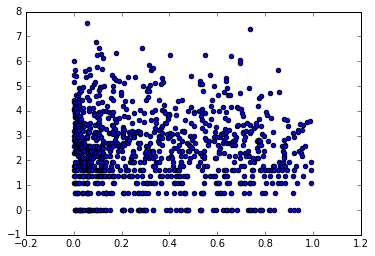

In [15]:
plt.scatter(x, y)

In [53]:
def bootstrap_resample(li):
    ave_original = np.average(li)
    aves = []
    for i in range(1000):
        sample = []
        for i in range(len(li)):
            sample.append(random.choice(li))
        aves.append(np.average(sample))
    tail = sorted(aves)[24]
    head = sorted(aves)[975]
    return (ave_original, tail, head)

In [54]:
def create_normed_dfs(df):
    
    # Normalize effects of authors by turning kudos into z-score corresponding to works from this author
    # Seems not useful b/c many authors only have 1 work
#     author_list = df.Author.drop_duplicates().tolist()
#     combined = []
#     for author in author_list:
#         df_a = df[df.Author == author]
#         if len(df_a) > 1:
#             df_a['Kudos'] = (df_a['Kudos'] - df_a['Kudos'].mean())/df_a['Kudos'].std(ddof=0)
#             combined.append(df_a)        
#     df = pd.concat(combined)
#     df = df[df.Kudos != 0]

# #     Normalize by creating hits/kudos 
#     df = df[df.Hits != 0]
#     df = df[df.Kudos != 0]
#     df['Kudos/Hits'] = df['Kudos'].astype(float)/df['Hits'].astype(float)
    
#     Normalize by log scale
    df = df[df.Kudos != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df = df[df.Hits != 0]
    df['Hits'] = np.log(df['Hits'])
    df['Kudos/Hits'] = df['Kudos'] - df['Hits']

#     # filter 0s
# #     df = df.fillna(0)"

#     # turn into z scores
#     df['Cos'] = df['Cos'].astype(float)
#     df['Cos'] = (df['Cos'] - df['Cos'].mean())/df['Cos'].std(ddof=0)

    return df

### Plot with bins

In [100]:
def create_dict(fandom, field, binsize):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)
    df = df.dropna(subset = [field])
    df = create_normed_dfs(df)
    # Make bins
    df.KL = df.KL.astype(float)
    min_kl = min(df.KL.tolist()) - 0.1
    max_kl = max(df.KL.tolist()) + 0.1
    dic = {}
    for i in np.arange(min_kl, max_kl, binsize):
        df_s = df[(df.KL >= i) & (df.KL < i+binsize)]
#         if len(df_s) > 9:
#             print (min_cos, max_cos)
#             print(df_s[field].tolist())
        li = df_s[field].tolist()
        if len(li) > 0:
            dic[i] = bootstrap_resample(li)
    return dic

In [101]:
fandom_list_futu

['arthurian_mythology_&_related_fandoms_temporal_lda_kl_tofutu.tsv',
 'attack_on_titan_temporal_lda_kl_tofutu.tsv',
 'bishoujo_senshi_sailor_moon_temporal_lda_kl_tofutu.tsv',
 'buffy_the_vampire_slayer_temporal_lda_kl_tofutu.tsv',
 'dcu_temporal_lda_kl_tofutu.tsv',
 'doctor_who_&_related_fandoms_temporal_lda_kl_tofutu.tsv',
 'dragon_age_all_media_types_temporal_lda_kl_tofutu.tsv',
 'haikyuu_temporal_lda_kl_tofutu.tsv',
 'hamilton_miranda_temporal_lda_kl_tofutu.tsv',
 'harry_potter_temporal_lda_kl_tofutu.tsv',
 'hetalia_axis_powers_temporal_lda_kl_tofutu.tsv',
 'homestuck_temporal_lda_kl_tofutu.tsv',
 'kuroko_no_basuke_temporal_lda_kl_tofutu.tsv',
 'les_miserables_all_media_types_temporal_lda_kl_tofutu.tsv',
 'marvel_temporal_lda_kl_tofutu.tsv',
 'ms_paint_adventures_temporal_lda_kl_tofutu.tsv',
 'naruto_temporal_lda_kl_tofutu.tsv',
 'one_direction_temporal_lda_kl_tofutu.tsv',
 'shakespare_william_works_temporal_lda_kl_tofutu.tsv',
 'sherlock_holmes_&_related_fandoms_temporal_lda_kl_tof

In [102]:
def create_dict_2(fandom, field, binsize):
    
    df1 = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)
    df2 = pd.read_csv(os.path.join(data_path,fandom.replace("prev","futu")), sep = '\t', error_bad_lines=False)
    df = pd.merge(df1, df2, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
       'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
       'PublishDate', 'Rating', 'Relationship', 'Summary', 'Title', 'URL',
       'UpdateDate', 'Words'], how='inner')
    
    df['Cos'] = df['Cos_y'] - df['Cos_x']
    df = df.dropna(subset = ['Cos'])
    df = df.dropna(subset = ['Kudos'])
    df = create_normed_dfs(df)
    
    # Make bins
    df.Cos = df.Cos.astype(float)
    min_cos = min(df.Cos.tolist()) - 0.1
    max_cos = max(df.Cos.tolist()) + 0.1
    dic = {}
    for i in np.arange(min_cos, max_cos, binsize):
        df_s = df[(df.Cos >= i) & (df.Cos < i+binsize)]
#         if len(df_s) > 9:
#             print (min_cos, max_cos)
#             print(df_s[field].tolist())
        dic[i] = bootstrap_resample(df_s[field].tolist())
    return dic

In [112]:
def plot_scatter(fandom_list):
    fig, axs = plt.subplots(5,5, figsize=(30, 20))
    axs = axs.ravel()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.rcParams.update({'axes.titlesize': 'large'})
    
    for i,fandom in enumerate(fandom_list):
#         try:
        dic = create_dict(fandom, 'Kudos', 0.5)
        x = sorted(dic.keys())
        y = [dic[j][0] for j in x]
#         print(x,y)

#     Make error bars
        lower_error = [dic[j][0]-dic[j][1] for j in x]
        upper_error = [dic[j][2]-dic[j][0] for j in x]
        asymmetric_error = [lower_error, upper_error]
        

        axs[i].errorbar(np.log(x), y, yerr=asymmetric_error,fmt='o')
        axs[i].plot(np.log(x), y, 'o-')
        title = fandom.replace('_temporal_cos_toprev.tsv', '').replace('all_media_types', '')\
        .replace("&_related_fandoms", '').replace("_", ' ').capitalize().replace('Dcu', 'DCU')
        axs[i].set_title(title, fontsize = 20)
#         axs[i].set_xlim([min(x) -1, max(x) + 1])
#         axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])
        for tick in axs[i].xaxis.get_major_ticks():
            tick.label.set_fontsize(16) 
        for tick in axs[i].yaxis.get_major_ticks():
            tick.label.set_fontsize(16)

#         break
        # ax.set_yscale('log')

        fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
        fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

#         except:
#             pass
#     plt.savefig('cos_log_kudos_toprev.pdf', format = 'pdf')



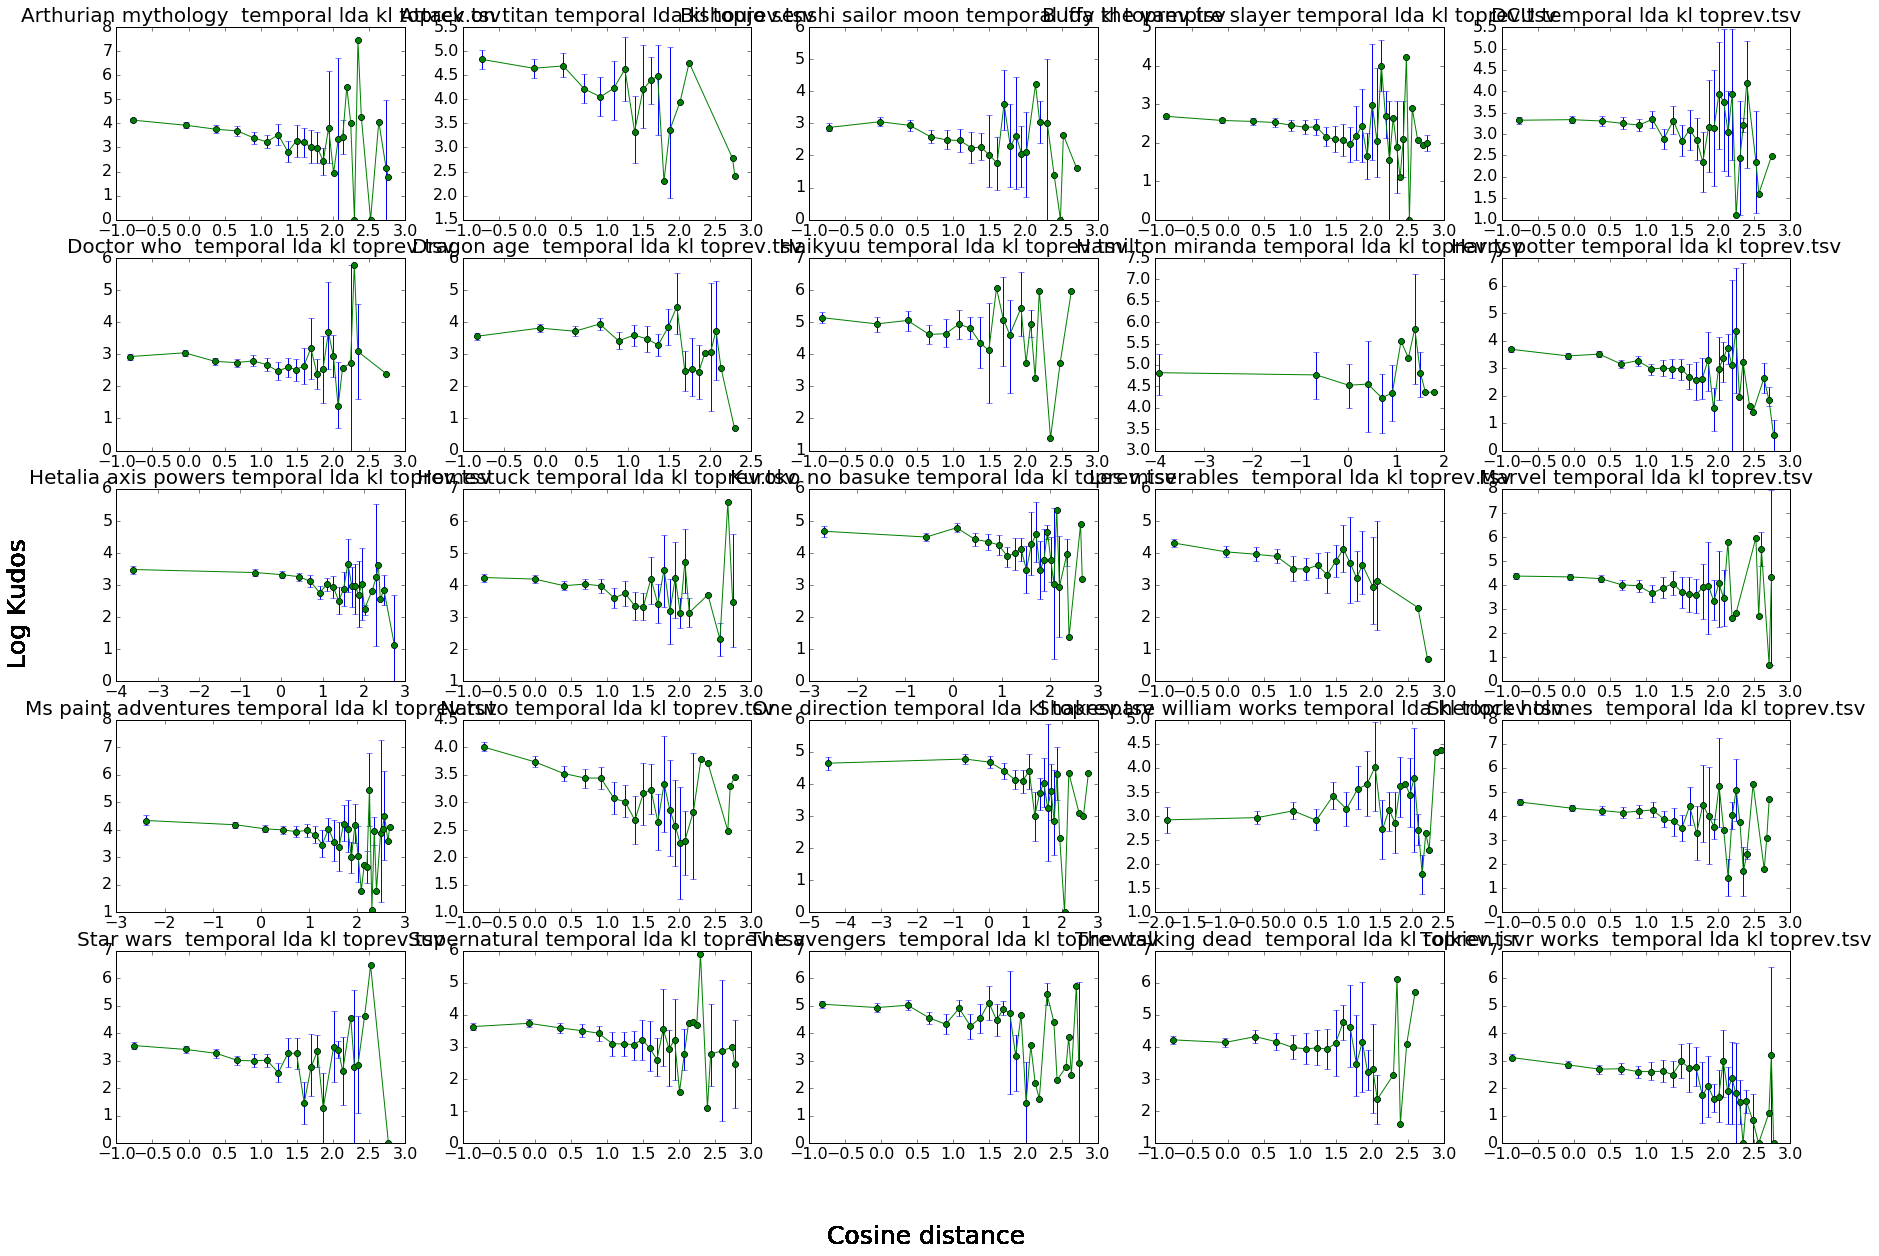

In [113]:
plot_scatter(fandom_list_prev)

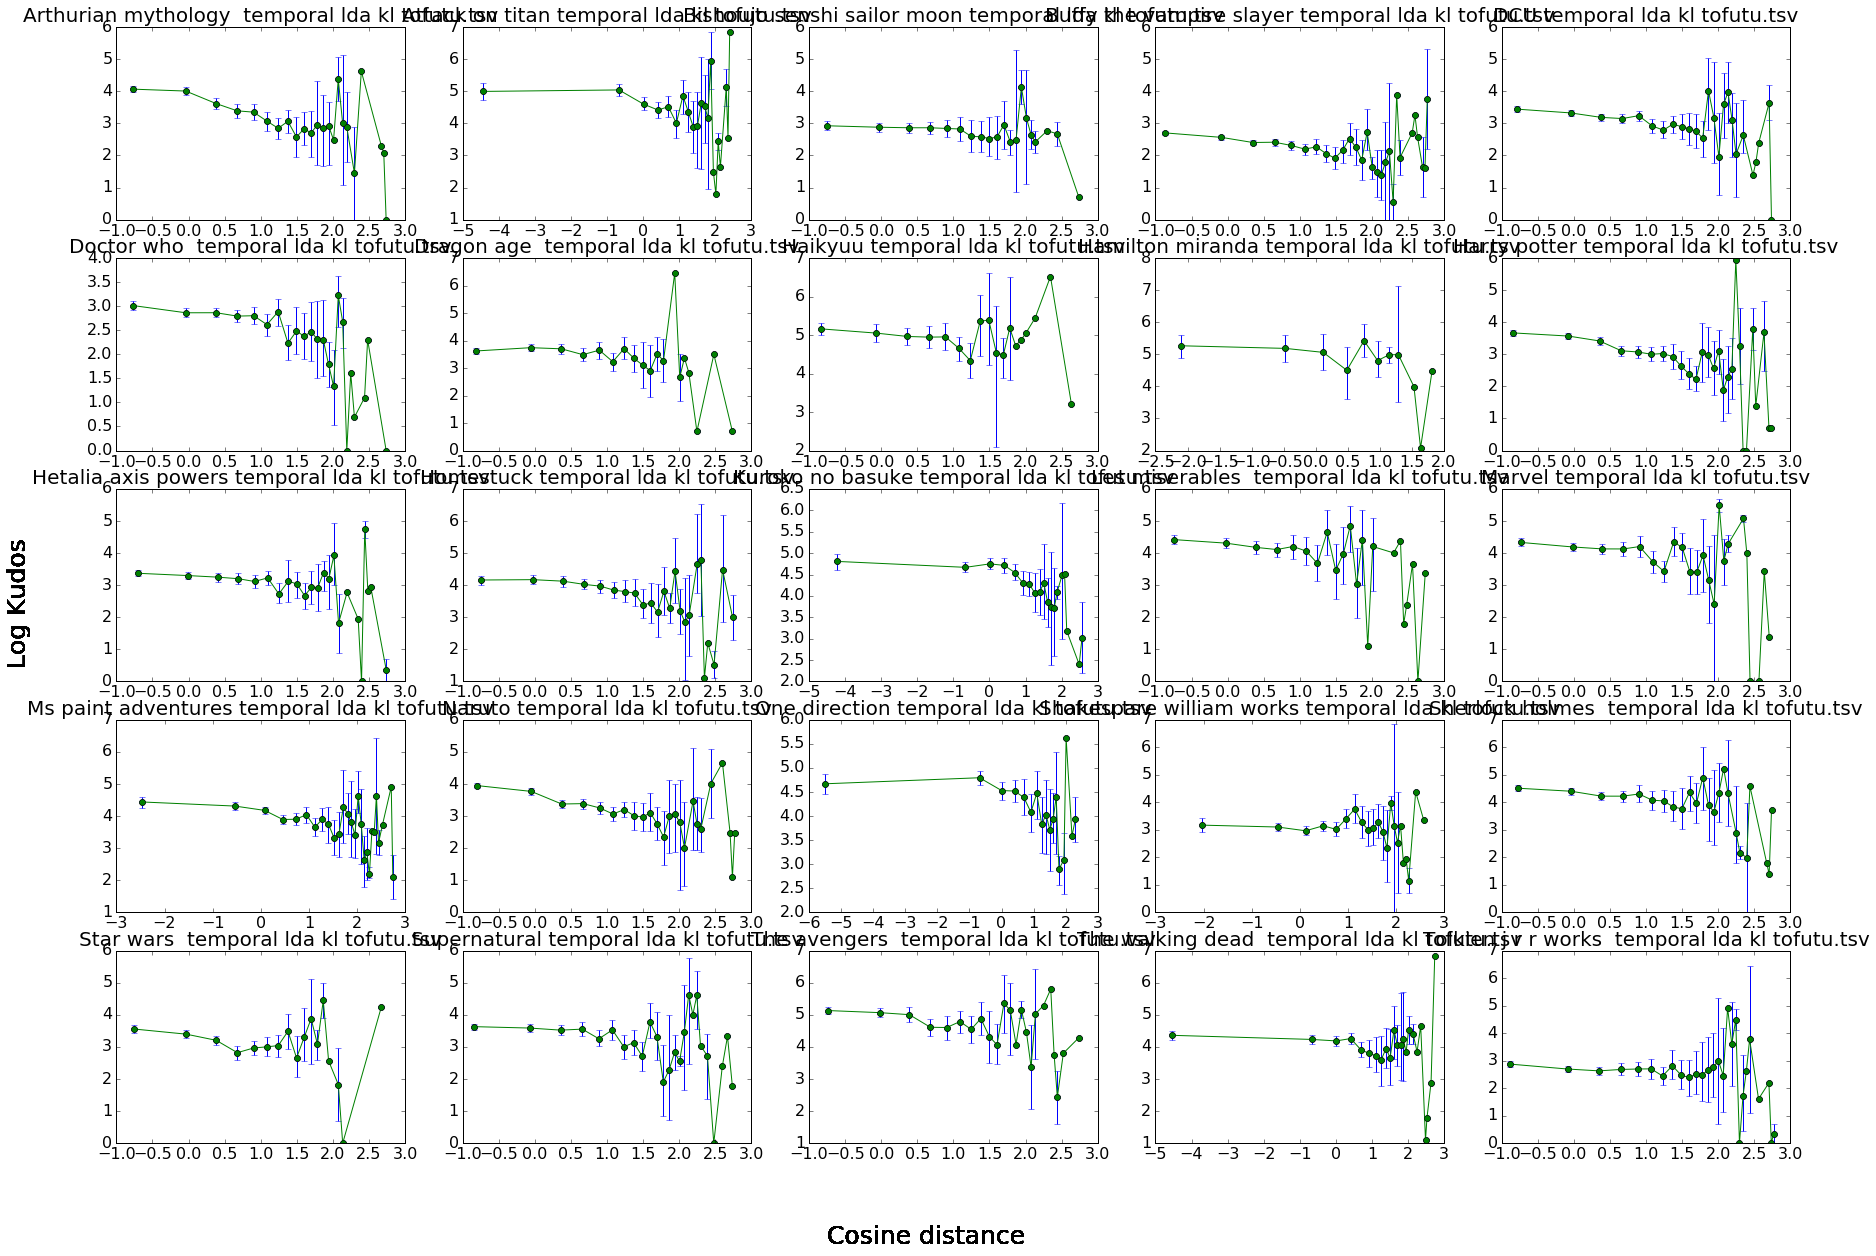

In [114]:
plot_scatter(fandom_list_futu)

In [85]:
def plot_scatter(fandom_list):
    fig, axs = plt.subplots(5,5, figsize=(30, 20))
    axs = axs.ravel()
    
    for i,fandom in enumerate(fandom_list):
#         try:
        df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)

        x = df['Cos']
        y = np.log(df['Kudos'])

        axs[i].hexbin(x, y,gridsize=15)

        fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
        fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

#         except:
#             pass
#     plt.savefig('cos_log_kudos_toprev.pdf', format = 'pdf')



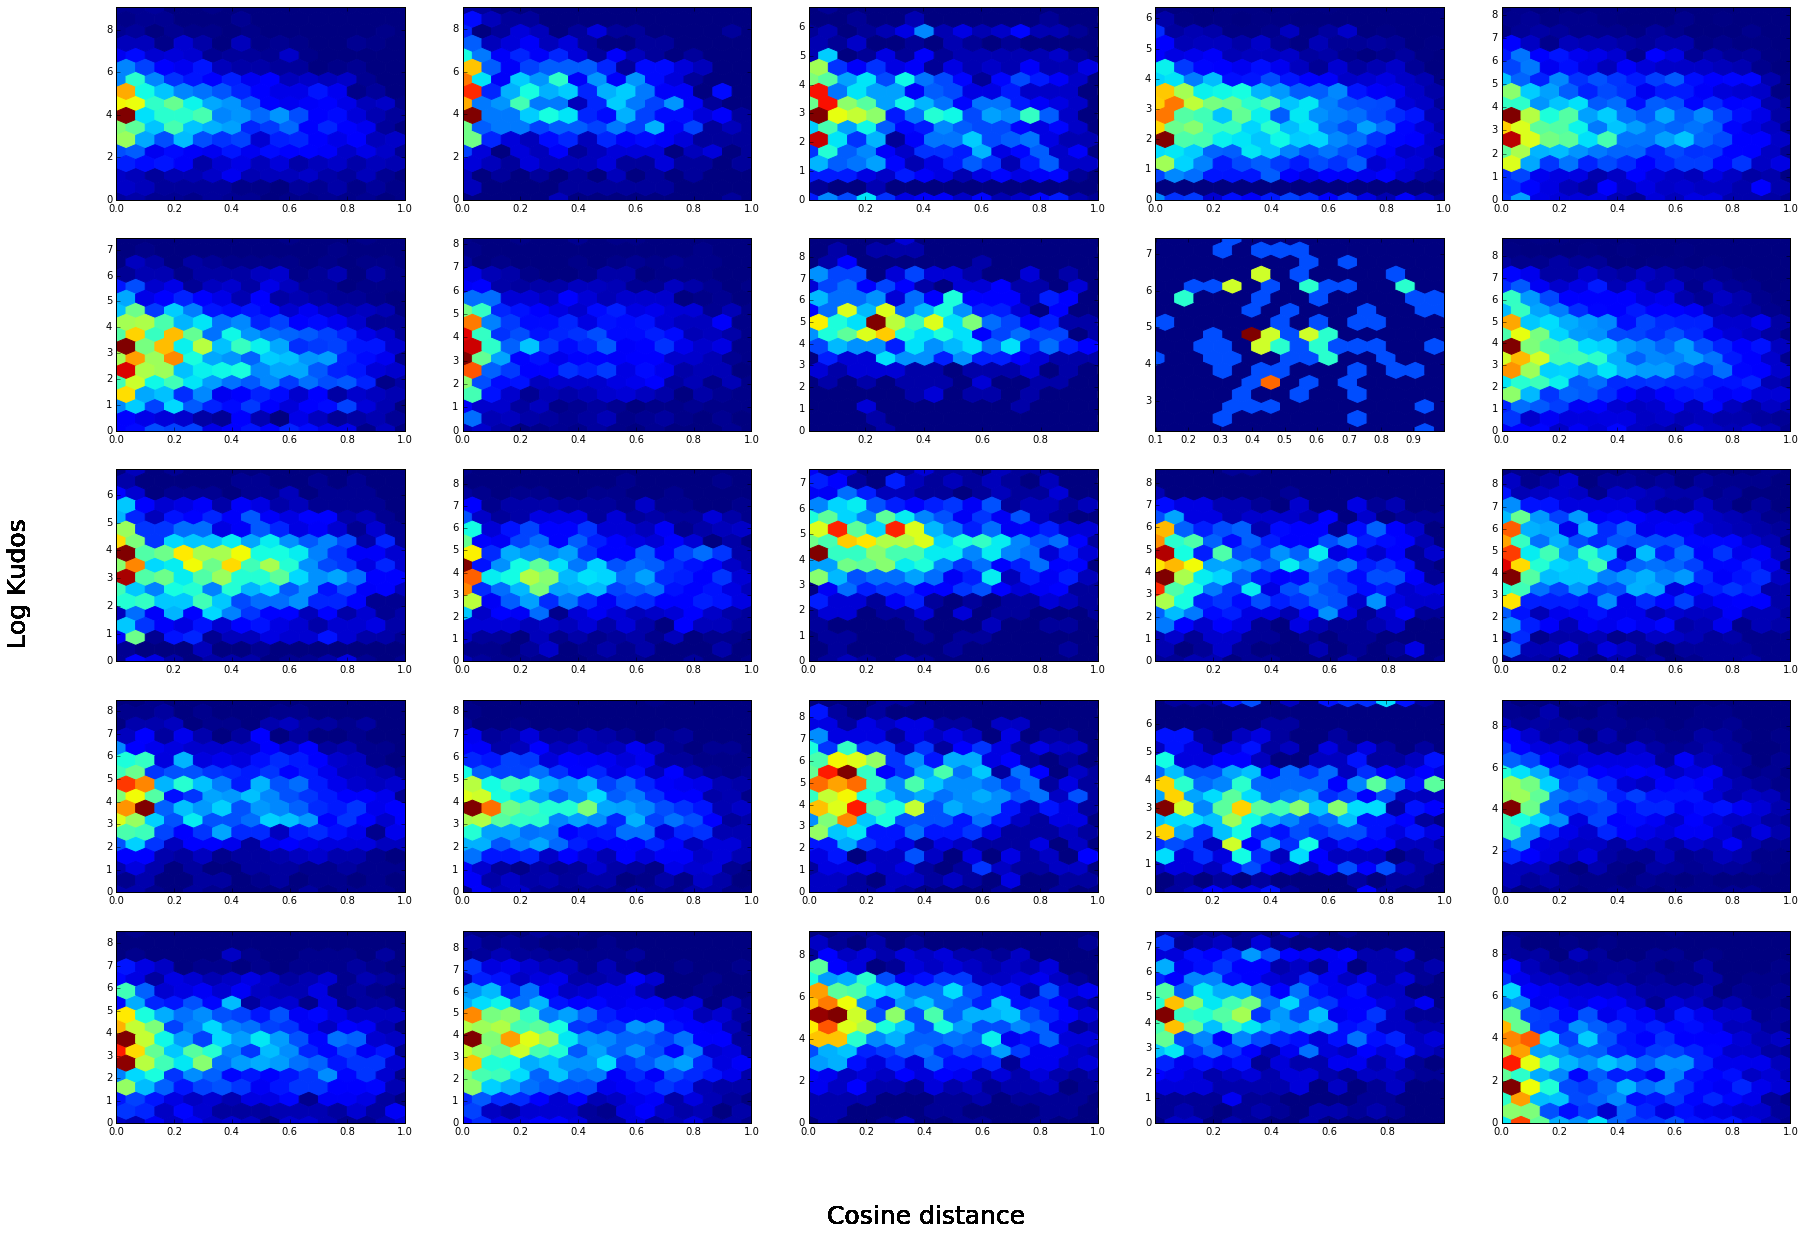

In [86]:
plot_scatter(fandom_list_prev)